In [1]:
import pandas as pd
from IPython.display import display, HTML
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import matplotlib.pyplot as plt

In [2]:
def display_scrollable_df(df, max_rows=5, height=300):
    display(HTML(df.head(max_rows).to_html(max_rows=max_rows, max_cols=100, escape=False)))
    display(HTML(f"""<style>
        .output_scroll {{
            max-height: {height}px;
            overflow-y: auto;
        }}
    </style>"""))

In [3]:
# Load Dataset - World Stock Prices (Daily Updating)
world_path = r"C:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\World Stock Prices (Daily Updating)\World-Stock-Prices-Dataset.csv"

world_df = pd.read_csv(world_path)

print("World Stock Prices Dataset:")
display_scrollable_df(world_df)

World Stock Prices Dataset:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Capital Gains
0,2025-05-30 00:00:00-04:00,7.020000,7.240000,6.920000,7.100000,12750600.0,0.0,0.0,peloton,PTON,fitness,usa,NaN
1,2025-05-30 00:00:00-04:00,102.639999,102.940002,100.790001,102.000000,1505500.0,0.0,0.0,crocs,CROX,footwear,usa,NaN
2,2025-05-30 00:00:00-04:00,71.610001,72.470001,71.610001,72.099998,28013500.0,0.0,0.0,the coca-cola company,KO,food & beverage,usa,NaN
3,2025-05-30 00:00:00-04:00,125.080002,126.190002,123.750000,124.510002,82500.0,0.0,0.0,adidas,ADDYY,apparel,germany,NaN
4,2025-05-30 00:00:00-04:00,294.970001,295.750000,291.630005,294.049988,5251700.0,0.0,0.0,american express,AXP,finance,usa,NaN


In [4]:
# Display basic information about the dataset
world_df.info()

# Display missing values per column
print("Missing values per column:")
print(world_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308386 entries, 0 to 308385
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           308386 non-null  object 
 1   Open           308386 non-null  float64
 2   High           308386 non-null  float64
 3   Low            308386 non-null  float64
 4   Close          308386 non-null  float64
 5   Volume         308386 non-null  float64
 6   Dividends      308386 non-null  float64
 7   Stock Splits   308386 non-null  float64
 8   Brand_Name     308386 non-null  object 
 9   Ticker         308386 non-null  object 
 10  Industry_Tag   308386 non-null  object 
 11  Country        308386 non-null  object 
 12  Capital Gains  2 non-null       float64
dtypes: float64(8), object(5)
memory usage: 30.6+ MB
Missing values per column:
Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Volume        

In [5]:
# Convert 'Date' column to datetime format and display the date range
world_df['Date'] = pd.to_datetime(world_df['Date'], utc=True)  
print("Date range:", world_df['Date'].min(), "to", world_df['Date'].max())

Date range: 2000-01-03 05:00:00+00:00 to 2025-05-30 04:00:00+00:00


In [6]:
# Display the types of each column
print("Column types:")
print(world_df.dtypes)

Column types:
Date             datetime64[ns, UTC]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Dividends                    float64
Stock Splits                 float64
Brand_Name                    object
Ticker                        object
Industry_Tag                  object
Country                       object
Capital Gains                float64
dtype: object


In [7]:
# Filter the dataset for USA stocks and drop unnecessary columns
df_filtered = world_df.copy()
df_filtered = df_filtered[df_filtered["Country"] == "usa"]
df_filtered = df_filtered.drop(['Brand_Name', 'Capital Gains', 'Country', 'Industry_Tag', 'Stock Splits', 'Dividends'], axis=1)
df_filtered.head()

,Date,Open,High,Low,Close,Volume,Ticker
0,2025-05-30 04:00:00+00:00,7.020000,7.240000,6.920000,7.100000,12750600.0,PTON
1,2025-05-30 04:00:00+00:00,102.639999,102.940002,100.790001,102.000000,1505500.0,CROX
2,2025-05-30 04:00:00+00:00,71.610001,72.470001,71.610001,72.099998,28013500.0,KO
4,2025-05-30 04:00:00+00:00,294.970001,295.750000,291.630005,294.049988,5251700.0,AXP
6,2025-05-30 04:00:00+00:00,361.350006,367.040009,361.350006,365.190002,8726000.0,V


In [8]:
df_filtered.set_index('Date', inplace=True)
df_filtered.head()

,Open,High,Low,Close,Volume,Ticker
Date,,,,,,
2025-05-30 04:00:00+00:00,7.020000,7.240000,6.920000,7.100000,12750600.0,PTON
2025-05-30 04:00:00+00:00,102.639999,102.940002,100.790001,102.000000,1505500.0,CROX
2025-05-30 04:00:00+00:00,71.610001,72.470001,71.610001,72.099998,28013500.0,KO
2025-05-30 04:00:00+00:00,294.970001,295.750000,291.630005,294.049988,5251700.0,AXP
2025-05-30 04:00:00+00:00,361.350006,367.040009,361.350006,365.190002,8726000.0,V


In [9]:
# Display missing values in the filtered DataFrame
df_filtered.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Ticker    0
dtype: int64

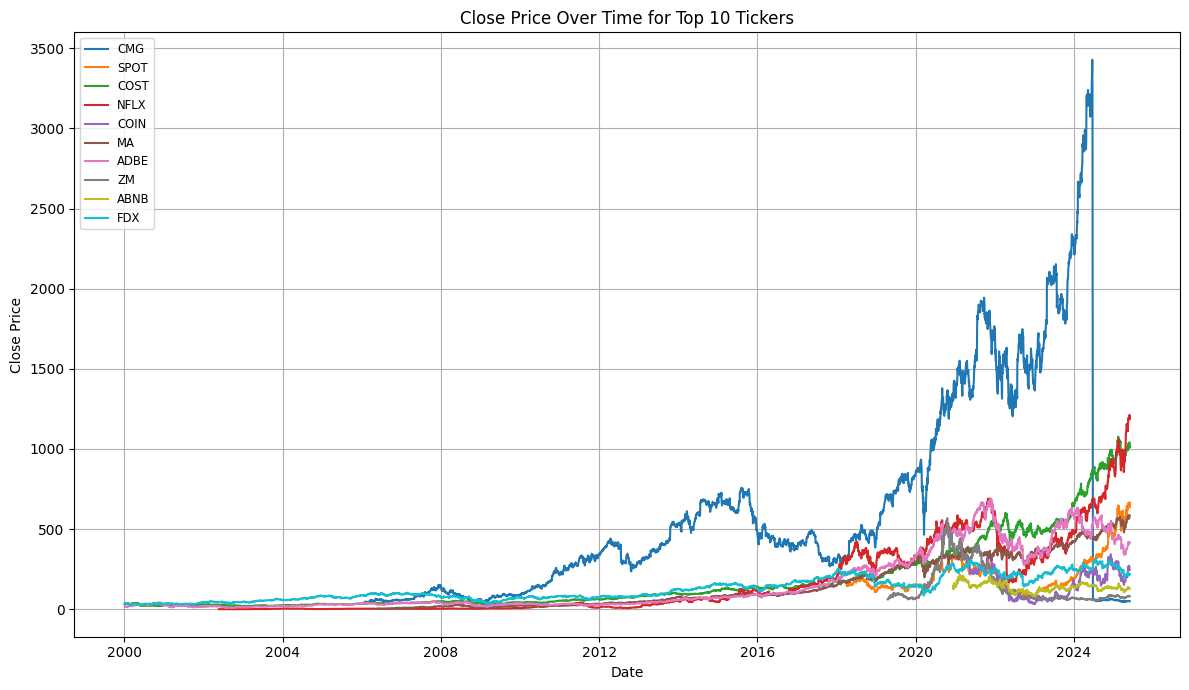

In [10]:
# Plotting the Close Price Over Time for the Top 10 Tickers
top_tickers = (
    df_filtered.groupby("Ticker")["Close"]
    .mean()
    .nlargest(10)
    .index
)

plt.figure(figsize=(12, 7))
for ticker in top_tickers:
    df_ticker = df_filtered[df_filtered["Ticker"] == ticker]
    plt.plot(df_ticker.index, df_ticker["Close"], label=ticker)

plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Close Price Over Time for Top 10 Tickers")
plt.legend(loc="upper left", fontsize="small")
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# Filter the DataFrame for Netflix (Ticker: NFLX) and sort by date
df_stock = df_filtered[df_filtered["Ticker"] == "NFLX"].copy()
df_stock = df_stock.sort_index()
df_stock.head()

,Open,High,Low,Close,Volume,Ticker
Date,,,,,,
2002-05-23 04:00:00+00:00,1.156429,1.242857,1.145714,1.196429,104790000.0,NFLX
2002-05-24 04:00:00+00:00,1.214286,1.225000,1.197143,1.210000,11104800.0,NFLX
2002-05-28 04:00:00+00:00,1.213571,1.232143,1.157143,1.157143,6609400.0,NFLX
2002-05-29 04:00:00+00:00,1.164286,1.164286,1.085714,1.103571,6757800.0,NFLX
2002-05-30 04:00:00+00:00,1.107857,1.107857,1.071429,1.071429,10154200.0,NFLX


III. ARIMA

In addition to the Linear Regression and LSTM models, we also implemented an ARIMA model for time series forecasting. 

In [12]:
 # Use only the 'Close' column for ARIMA (a univariate time series model)
series = df_stock['Close']
series.head()

Date
2002-05-23 04:00:00+00:00    1.196429
2002-05-24 04:00:00+00:00    1.210000
2002-05-28 04:00:00+00:00    1.157143
2002-05-29 04:00:00+00:00    1.103571
2002-05-30 04:00:00+00:00    1.071429
Name: Close, dtype: float64

In [13]:
# ARIMA requires the series to be stationary, so perform the Augmented Dickey-Fuller test
result = adfuller(series.dropna()) 
print("Augmented Dickey-Fuller Test:")
print(f"ADF Statistic: {result[0]}") 
print(f"p-value: {result[1]}") 
if result[1] < 0.05:
    print("The series is stationary (reject null hypothesis).")
else:
    print("The series is non-stationary (fail to reject null hypothesis).")

Augmented Dickey-Fuller Test:
ADF Statistic: 2.660314559855617
p-value: 0.9990838905130095
The series is non-stationary (fail to reject null hypothesis).


In [14]:
# Transform the series to make it stationary
series_diff = series.diff().dropna() 

# Perform the Augmented Dickey-Fuller test on the differenced series
result_diff = adfuller(series_diff)
print("Augmented Dickey-Fuller Test on Differenced Series:")
print(f"ADF Statistic: {result_diff[0]}")
print(f"p-value: {result_diff[1]}")
if result_diff[1] < 0.05:
    print("The differenced series is stationary (reject null hypothesis).")
else:
    print("The differenced series is non-stationary (fail to reject null hypothesis).")

Augmented Dickey-Fuller Test on Differenced Series:
ADF Statistic: -10.970596731458945
p-value: 7.898561975334075e-20
The differenced series is stationary (reject null hypothesis).


In [15]:
# Parameters
window_size = 20
forecast_horizon = 1  # Predict 21st day
order = (5, 1, 0)  

In [16]:
# Ensure sorted by date and index is datetime
series = series.sort_index()
series.index = pd.to_datetime(series.index) 


In [17]:
# Split the series into training and testing sets
train_size = int(len(series) * 0.8)  # 80% for training
train_series = series[:train_size]
test_series = series[train_size:]


In [18]:
# Store forecasts and corresponding actuals
predictions = []
actuals = []
forecast_dates = []

In [19]:
# Loop through the series to create rolling forecasts
for i in range(window_size, len(test_series) - forecast_horizon):
    train_start = train_size + i - window_size
    train_end = train_size + i
    train = series[train_start:train_end]  # train always uses full history from original series

    model = ARIMA(train, order=order)
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=forecast_horizon).iloc[0]

    actual_idx = train_size + i + forecast_horizon
    predictions.append(forecast)
    actuals.append(series[actual_idx])
    forecast_dates.append(series.index[actual_idx])

c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\statsmodels\tsa\base\tsa_model

In [20]:
# Print the summary of the ARIMA model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   20
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -76.938
Date:                Mon, 23 Jun 2025   AIC                            165.875
Time:                        21:08:39   BIC                            171.542
Sample:                             0   HQIC                           166.834
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2017      0.481      0.420      0.675      -0.741       1.144
ar.L2         -0.1007      0.283     -0.356      0.722      -0.656       0.454
ar.L3         -0.3183      0.244     -1.307      0.1

In [22]:
# Results DataFrame
results_df = pd.DataFrame({
    'Date': forecast_dates,
    'Actual': actuals,
    'Forecast': predictions
}).set_index('Date')

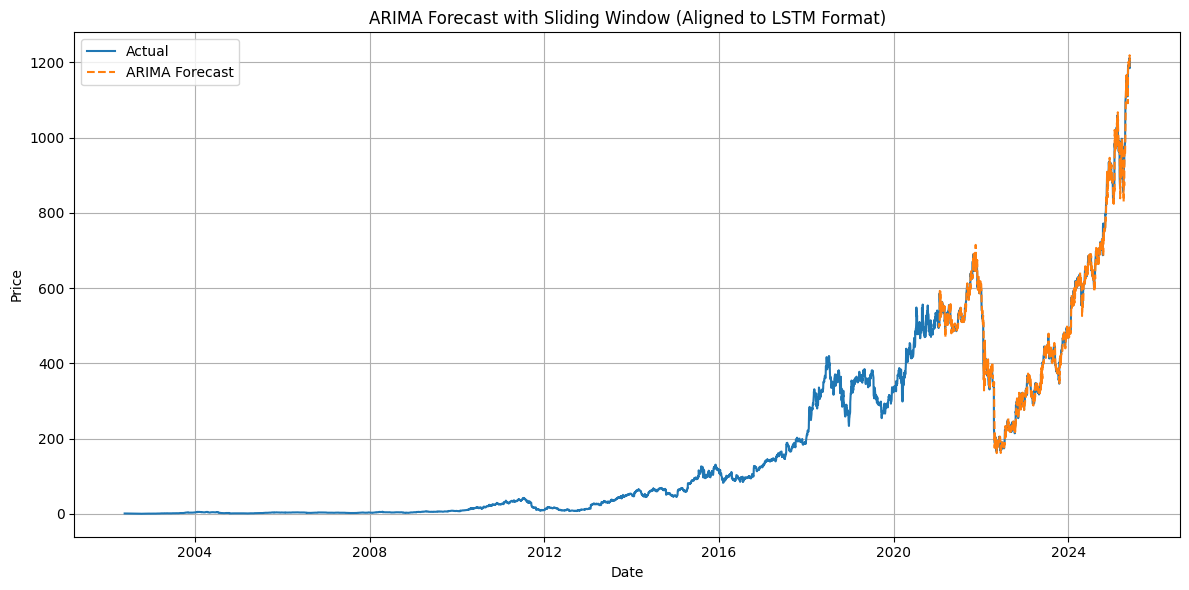

In [23]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(series, label='Actual')
plt.plot(results_df['Forecast'], label='ARIMA Forecast', linestyle='--')
plt.title('ARIMA Forecast with Sliding Window (Aligned to LSTM Format)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(actuals, predictions)
mae = mean_absolute_error(actuals, predictions)
rsme = np.sqrt(mse)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rsme:.2f}")



Mean Squared Error: 424.22
Mean Absolute Error: 13.82
Root Mean Squared Error: 20.60


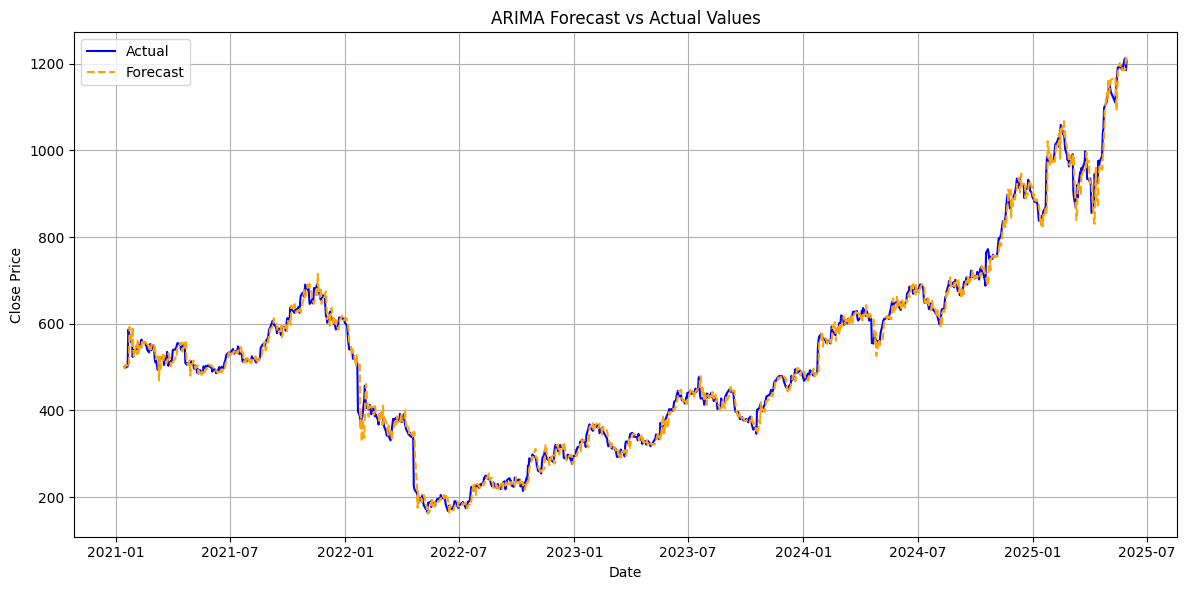

In [25]:
# Plot predicted vs actual values
plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['Actual'], label='Actual', color='blue')
plt.plot(results_df.index, results_df['Forecast'], label='Forecast', color='orange', linestyle='--')
plt.title('ARIMA Forecast vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



However, the ARIMA model is not suitable for long-term forecasting due to its reliance on historical data and the assumption of stationarity. 

In [26]:
# Fit the ARIMA model on differenced series (d=1)
model2 = ARIMA(train_series, order=order)
model_fit = model2.fit()

# Print the summary of the ARIMA model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4673
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -13237.418
Date:                Mon, 23 Jun 2025   AIC                          26486.836
Time:                        21:10:23   BIC                          26525.532
Sample:                             0   HQIC                         26500.445
                               - 4673                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0925      0.006    -16.030      0.000      -0.104      -0.081
ar.L2          0.0375      0.006      6.778      0.000       0.027       0.048
ar.L3          0.0054      0.006      0.893      0.3

c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [27]:
# Forecast the next-day close price
forecast2 = model_fit.forecast(steps=len(test_series))



c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [28]:
# Evaluation metrcs
mse = mean_squared_error(test_series, forecast2)
mae = mean_absolute_error(test_series, forecast2)
rmse = np.sqrt(mean_squared_error(test_series, forecast2))
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rsme:.2f}")

Mean Squared Error: 53108.00
Mean Absolute Error: 177.94
Root Mean Squared Error: 20.60


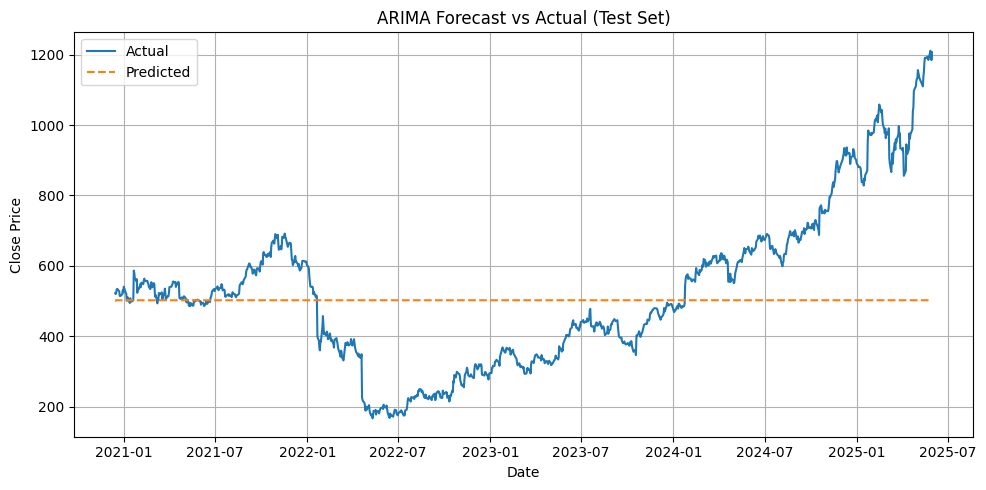

In [29]:
# Plotting the actual vs forecasted values
plt.figure(figsize=(10, 5))
plt.plot(test_series.index, test_series, label='Actual')
plt.plot(test_series.index, forecast2, label='Predicted', linestyle='--')
plt.title('ARIMA Forecast vs Actual (Test Set)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Even with optimized parameters using auto-ARIMA, the model did not perform well for long-term forecasting. 

c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\anitr\AAI510_Group6Project\AAI5

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.40 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=30272.123, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=28440.775, Time=0.12 sec


c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=30270.123, Time=0.03 sec


c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=27893.565, Time=0.27 sec


c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=27408.368, Time=0.31 sec


c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=27333.943, Time=0.36 sec


c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=27270.420, Time=0.43 sec


c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.48 sec


c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.59 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=27268.420, Time=0.18 sec


c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,0)(0,0,0)[0]             : AIC=27331.943, Time=0.15 sec


c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=1.13 sec


c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.96 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 13.352 seconds
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4673
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -13237.418
Date:                Mon, 23 Jun 2025   AIC                          26486.836
Time:                        21:10:47   BIC                          26525.532
Sample:                             0   HQIC                         26500.445
                               - 4673                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0925      0.006    -16.030      0.000      -0.104     

c:\Users\anitr\AAI510_Group6Project\AAI510_Group6Project\arima-env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


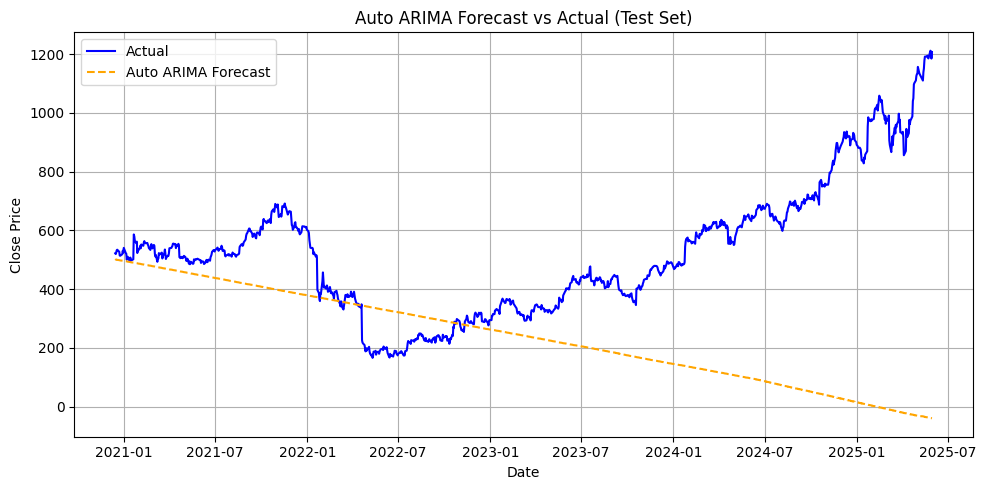

In [30]:
train_values = train_series.values
test_values = test_series.values
test_index = test_series.index  

# Fit the Auto ARIMA model
model_auto = auto_arima(
    train_values,
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# Print the summary of the ARIMA model
print(model_fit.summary())

# Forecast the next values using the Auto ARIMA model
forecast = model_auto.predict(n_periods=len(test_values))
forecast_series = pd.Series(forecast, index=test_index)

# Evaluation metrics
mse = mean_squared_error(test_values, forecast)
mae = mean_absolute_error(test_values, forecast)
rmse = np.sqrt(mean_squared_error(test_values, forecast))
print(f"Auto ARIMA MSE:  {mse:.2f}")   
print(f"Auto ARIMA MAE:  {mae:.2f}")
print(f"Auto ARIMA RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(test_index, test_values, label='Actual', color='blue')
plt.plot(test_index, forecast_series, label='Auto ARIMA Forecast', color='orange', linestyle='--')
plt.title('Auto ARIMA Forecast vs Actual (Test Set)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
